In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

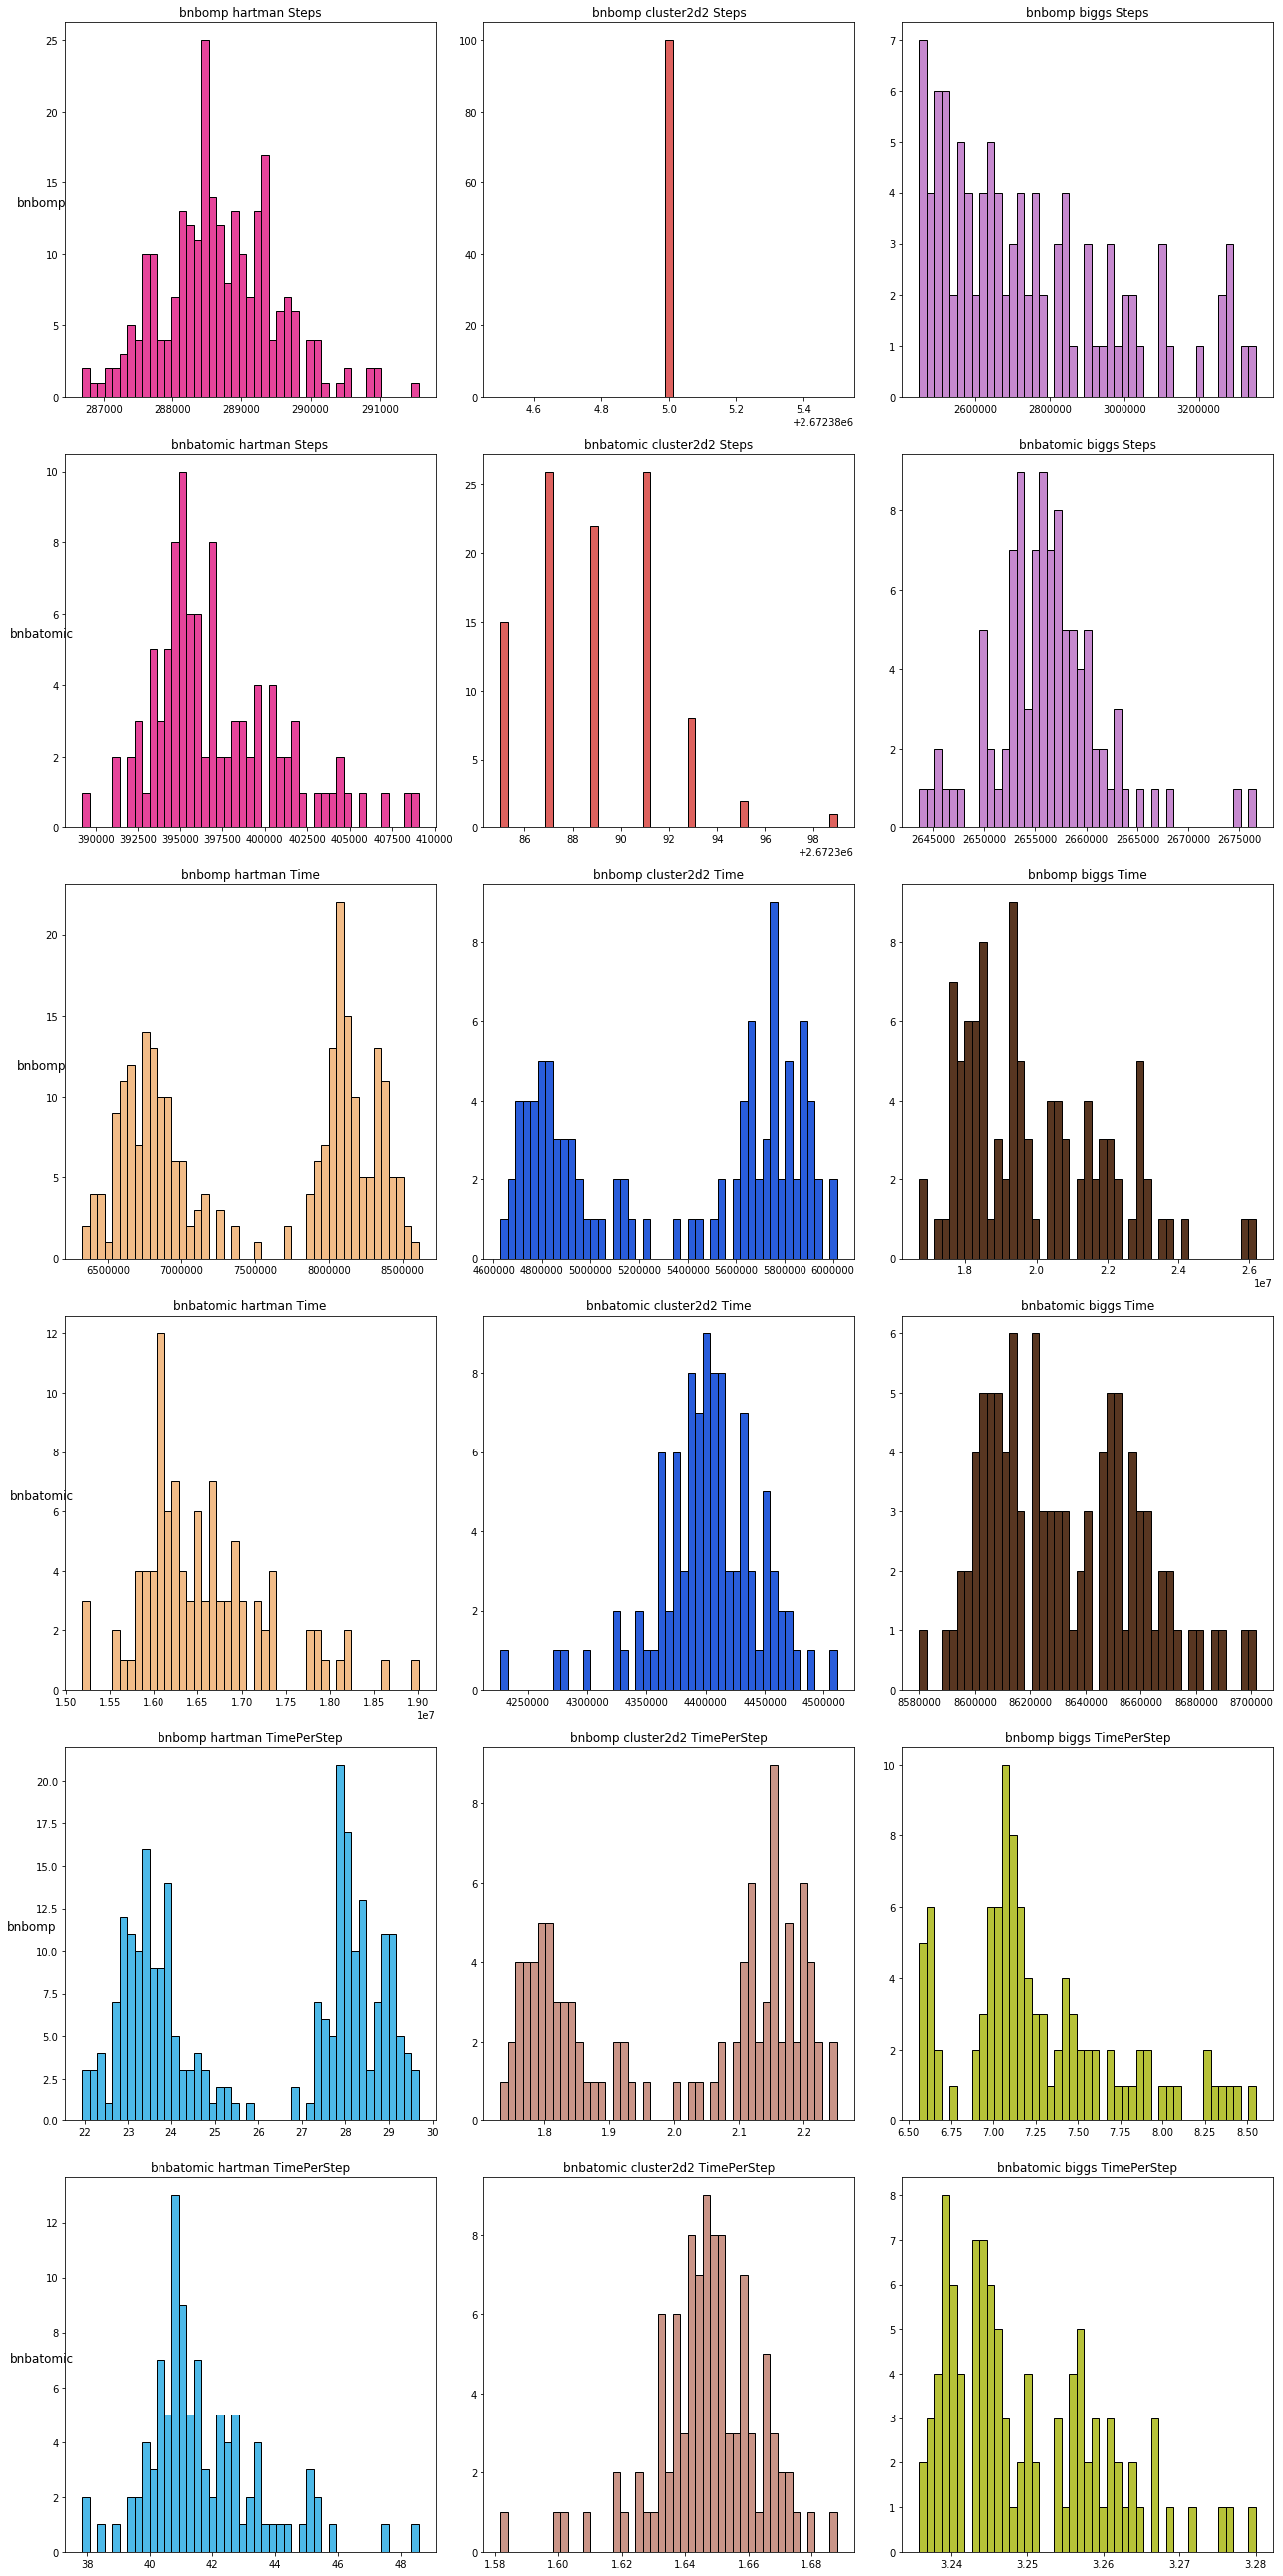

In [60]:
TEST_NAMES = [
    'hartman',
    'cluster2d2',
    'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic'
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
COLORS = [np.random.rand(3,) for i in range(TEST_COUNT * ALGO_COUNT * PARAM_COUNT)]
ALGO_COUNT = len(ALGORITHM_NAMES)
TEST_COUNT = len(TEST_NAMES)
PARAM_COUNT = len(HIST_PARAMS)

fig, axes = plt.subplots(nrows=ALGO_COUNT * PARAM_COUNT, ncols=TEST_COUNT)
fig.set_size_inches(18, 6 * (ALGO_COUNT * PARAM_COUNT))

for i, ax in enumerate(axes.flat):
    idx_param = int((i / (ALGO_COUNT * TEST_COUNT)))
    param_name = HIST_PARAMS[idx_param]
    idx_algo = int((i % (ALGO_COUNT * TEST_COUNT)) / TEST_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    idx_test = (i % (ALGO_COUNT * TEST_COUNT)) % TEST_COUNT
    test_name = TEST_NAMES[idx_test]

    file_path = '{}/data_{}.txt'.format(algo_name, test_name)
    dataset = pd.read_csv(file_path, sep=',')
    
    ax.hist(dataset[param_name], color = COLORS[idx_param * PARAM_COUNT + idx_test], edgecolor = 'black', bins = int(45))
    ax.set_title('{} {} {}'.format(algo_name, test_name, param_name))
    
for i, ax in enumerate(axes[:,0]):
    idx_algo = int(i % ALGO_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    ax.set_ylabel(algo_name, size='large', rotation=0)

fig.tight_layout()
plt.show()